In [1]:
import os
import sys

import pandas as pd
import numpy as np
import scipy.io

import matplotlib.pyplot as plt
from importlib import reload

sys.path.append('/home/feldheimlab/population-encoding-main')

from Experiment import *
savedir = '/media/feldheimlab/IMAGING/Brian/auditory'

In [2]:
wd = '/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-02-03-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/'

asdf = scipy.io.loadmat(wd + 'asdf.mat')['asdf_raw']
IDs = scipy.io.loadmat(wd + 'asdf.mat')['IDs']
location = scipy.io.loadmat(wd + 'asdf.mat')['location']
basicinfo  = scipy.io.loadmat(wd + 'basicinfo.mat')
eisummary = scipy.io.loadmat(wd + 'eisummary.mat')
xy = scipy.io.loadmat(wd + 'xy.mat')
datasets = np.concatenate([[0],np.squeeze(scipy.io.loadmat(wd + 'segmentlengths.mat')['segmentseparations'])])/1000
rise = np.squeeze(scipy.io.loadmat(wd + 'ttlTimes.mat')['ttlTimes'])/1000

In [3]:
wd2 = '/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-01-30-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/'

asdf2 = scipy.io.loadmat(wd + 'asdf.mat')['asdf_raw']
IDs2 = scipy.io.loadmat(wd + 'asdf.mat')['IDs']
location2 = scipy.io.loadmat(wd + 'asdf.mat')['location']
basicinfo2  = scipy.io.loadmat(wd + 'basicinfo.mat')
eisummary2 = scipy.io.loadmat(wd + 'eisummary.mat')
xy2 = scipy.io.loadmat(wd + 'xy.mat')
datasets2 = np.concatenate([[0],np.squeeze(scipy.io.loadmat(wd + 'segmentlengths.mat')['segmentseparations'])])/1000
rise2 = np.squeeze(scipy.io.loadmat(wd + 'ttlTimes.mat')['ttlTimes'])/1000

/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-02-03-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/
	Loading xy.mat with SciPy
Surface definition (SurfaceContour.mat) does not exist
	Loading xy.mat with SciPy
Surface definition (SurfaceContour.mat) does not exist
197/197 neurons are in the SC
130/130 neurons are in the SC
	Loading AuditorySpotSummary_5.mat with SciPy
	Loading AuditorySpotSummary_5.mat with SciPy
	Loading AuditorySpotSummary_10.mat with SciPy
	Loading AuditorySpotSummary_10.mat with SciPy
54/197 auditory neurons are in the SC
45/197 auditory neurons are in the SC
30/130 auditory neurons are in the SC
47/130 auditory neurons are in the SC


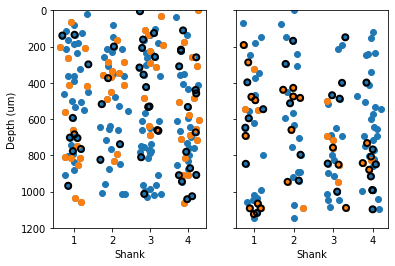

In [4]:

#load the data for each of the datsets
print(wd)
e = Experiment(wd) # load the experimental data
# e.resetUseIDs()
e2 = Experiment(wd2) # load the experimental data

fig, axs = plt.subplots(1,2)


print('{0}/{1} neurons are in the SC'.format(e.nNeu, e.nNeuTotal))
print('{0}/{1} neurons are in the SC'.format(e2.nNeu, e2.nNeuTotal))

axs[0].scatter(e.y[e.useIDs], e.neurons['depth'][e.useIDs], label='neurons')
axs[1].scatter(e2.y[e2.useIDs], e2.neurons['depth'][e2.useIDs], label='neurons')

posneu1 = np.where(e2.loadData('AuditorySpotSummary_5.mat')['posneu'])[0]
posneu2 = np.where(e.loadData('AuditorySpotSummary_5.mat')['posneu'])[0]
posneu3 = np.where(e2.loadData('AuditorySpotSummary_10.mat')['posneu'])[0]
posneu4 = np.where(e.loadData('AuditorySpotSummary_10.mat')['posneu'])[0]

axs[0].scatter(e.y[posneu2], e.neurons['depth'][posneu2], label='posneu pre')
axs[0].scatter(e.y[posneu4], e.neurons['depth'][posneu4], label='posneu post', edgecolor='black', linewidth=2, facecolor='None')

axs[1].scatter(e2.y[posneu1], e2.neurons['depth'][posneu1], label='posneu pre')
axs[1].scatter(e2.y[posneu3], e2.neurons['depth'][posneu3], label='posneu post', edgecolor='black', linewidth=2, facecolor='None')

print('{0}/{1} auditory neurons are in the SC'.format(len(posneu2), e.nNeuTotal))
print('{0}/{1} auditory neurons are in the SC'.format(len(posneu4), e.nNeuTotal))

print('{0}/{1} auditory neurons are in the SC'.format(len(posneu1), e2.nNeuTotal))
print('{0}/{1} auditory neurons are in the SC'.format(len(posneu3), e2.nNeuTotal))

# e.removeWaveforms(5) #remove axon-like waveforms; class 5 waveforms
# print('{0}/{1} neurons are in the SC and have proper waveforms'.format(e.nNeu, e.nNeuTotal))
# plt.scatter(e.y[e.useIDs], e.neurons['depth'][e.useIDs], label='Non-axonal')

# compare useIDs and those that area visual responive
# e.getVisNeurons()
# vis_ids = keepsimlist(e.useIDs, e.sig_vis)
# print('{0}/{1} neurons are in the SC, have proper waveforms, and visually responsive'.format(len(vis_ids), e.nNeuTotal))
# plt.scatter(e.y[vis_ids], e.neurons['depth'][vis_ids], label='visual')

axs[0].set_ylim([1200,0])
axs[0].set_ylabel('Depth (um)')
axs[0].set_xlabel('Shank')
axs[0].set_xticks([0,200,400,600],[1,2,3,4])

axs[1].set_ylim([1200,0])
# axs[1].set_ylabel('Depth (um)')
axs[1].set_yticklabels([])
axs[1].set_xlabel('Shank')
axs[1].set_xticks([0,200,400,600],[1,2,3,4])
# plt.savefig(savedir + '/BLN_locations.png', dpi=300)
plt.show()

In [5]:
timerange = 1000
timeBinSz = 20

pat5 = e.loadData('AuditorySpotSummary_5.mat')['patterns_all']['fullpat'][0][0][0]
data_mat5 = patternToMatrix(pat5, timerange, timeBinSz, neuron_list=None, norm=False, count=True)

pat10 = e.loadData('AuditorySpotSummary_10.mat')['patterns_all']['fullpat'][0][0][0]
data_mat10 = patternToMatrix(pat10, timerange, timeBinSz, neuron_list=None, norm=False, count=True)

pat52 = e2.loadData('AuditorySpotSummary_5.mat')['patterns_all']['fullpat'][0][0][0]
data_mat52 = patternToMatrix(pat52, timerange, timeBinSz, neuron_list=None, norm=False, count=True)

pat102 = e2.loadData('AuditorySpotSummary_10.mat')['patterns_all']['fullpat'][0][0][0]
data_mat102 = patternToMatrix(pat102, timerange, timeBinSz, neuron_list=None, norm=False, count=True) 

	Loading AuditorySpotSummary_5.mat with SciPy
	Loading AuditorySpotSummary_10.mat with SciPy
	Loading AuditorySpotSummary_5.mat with SciPy
	Loading AuditorySpotSummary_10.mat with SciPy


In [14]:
pat5[0][0][0][0]

array([[4.5000e-01, 4.6400e+01, 2.1390e+02, 2.2055e+02, 3.1480e+02,
        3.4645e+02, 3.7920e+02, 4.1635e+02, 4.3500e+02, 4.3780e+02,
        4.4775e+02, 4.6615e+02, 4.7410e+02, 5.3525e+02, 6.7465e+02,
        7.0280e+02, 7.6920e+02, 8.0680e+02, 9.0490e+02, 9.0805e+02,
        9.5150e+02, 9.5470e+02, 9.7420e+02, 9.8255e+02, 9.8845e+02]])

(197, 1, 15, 30, 50)
16 12 0
7 11 4


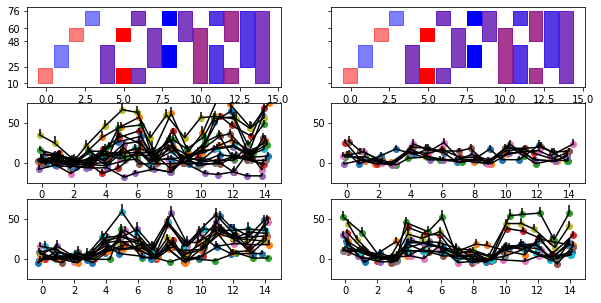

[27, 11, 60, 47]


In [10]:
similar = np.arange(pat10.shape[-1])
print(data_mat5.shape)


BLNs = [[[10000], [24000]],
        [[25000], [45000]],
        [[48000], [60000]],
        [[63000], [76000]],
        [[10000], [45000]],
        [[10000, 48000], [24000, 60000]],
        [[10000, 63000], [24000, 76000]],
        [[25000], [60000]],
        [[25000, 63000], [45000, 76000]],
        [[48000], [76000]],
        [[10000], [60000]],
        [[10000, 63000], [45000, 76000]],
        [[10000, 48000], [24000, 76000]],
        [[25000], [76000]],
        [[10000], [76000]]]

thresh = 15
BLNcolors= ['r','b']

r_transp = [0.5,  0,0.5,  0,0.5,1.0,0.5,0.5,  0,0.5,0.66,0.34,0.66,0.34,0.5]
b_transp = [  0,0.5,  0,0.5,0.5,  0,0.5,0.5,1.0,0.5,0.34,0.66,0.34,0.66,0.5]


fig, axs = plt.subplots(3,2, figsize=(10,5))

for b, BLN in enumerate(BLNs):
    if len(BLN[0])==1:
        axs[0][0].fill_between(np.arange(0,1,0.1)+b-0.5, BLN[0] , BLN[1], color = 'r', alpha=r_transp[b])
        axs[0][0].fill_between(np.arange(0,1,0.1)+b-0.5, BLN[0] , BLN[1], color = 'b', alpha=b_transp[b])
        axs[0][1].fill_between(np.arange(0,1,0.1)+b-0.5, BLN[0] , BLN[1], color = 'r', alpha=r_transp[b])
        axs[0][1].fill_between(np.arange(0,1,0.1)+b-0.5, BLN[0] , BLN[1], color = 'b', alpha=b_transp[b])
    else:
        for i in np.arange(2):
            axs[0][0].fill_between(np.arange(0,1,0.1)+b-0.5, BLN[0][i] , BLN[1][i], color = 'r', alpha=r_transp[b])
            axs[0][0].fill_between(np.arange(0,1,0.1)+b-0.5, BLN[0][i] , BLN[1][i], color = 'b', alpha=b_transp[b]) 
            axs[0][1].fill_between(np.arange(0,1,0.1)+b-0.5, BLN[0][i] , BLN[1][i], color = 'r', alpha=r_transp[b])
            axs[0][1].fill_between(np.arange(0,1,0.1)+b-0.5, BLN[0][i] , BLN[1][i], color = 'b', alpha=b_transp[b]) 
axs[0][0].set_yticks([10000,25000, 48000, 60000, 76000])            
axs[0][1].set_yticks([10000,25000, 48000, 60000, 76000])            
axs[0][0].set_yticklabels([10,25,48,60,76])   
axs[0][1].set_yticklabels([])        

BLNneuron2 = []
for sim in posneu2:
    base = np.mean(data_mat5[sim,0,:,:,-1:]/0.02)
    image = np.mean(data_mat5[sim,0,:,:,:1]/0.02, axis=(1,2))-base # axis =(1))
    der = np.diff(image)
    stdev = np.std(data_mat5[sim,0,:,:,:1]/0.02, axis=(1,2))
    if any(np.abs(der) > thresh):
        BLNneuron2.append(sim)
        xs = np.arange(15)+np.random.random(15)*0.5 - 0.25
        axs[1][0].errorbar(xs, image, yerr = [np.zeros_like(stdev), stdev/np.sqrt(30)] , c='k')
        axs[1][0].scatter(xs, image)

BLNneuron1 = []
for sim in posneu1:
    base = np.mean(data_mat52[sim,0,:,:,-1:]/0.02)
    image = np.mean(data_mat52[sim,0,:,:,:1]/0.02, axis=(1,2)) - base # axis =(1))
    der = np.diff(image)
    stdev = np.std(data_mat52[sim,0,:,:,:1]/0.02, axis=(1,2))
    if any(np.abs(der) > thresh):
        BLNneuron1.append(sim)
        xs = np.arange(15)+np.random.random(15)*0.5 - 0.25
        axs[1][1].errorbar(xs, image, yerr = [np.zeros_like(stdev), stdev/np.sqrt(30)] , c='k')
        axs[1][1].scatter(xs, image)
axs[1][0].set_ylim([-25,75])   
axs[1][1].set_ylim([-25,75])                    

BLNneuron4 = []
for sim in posneu4:
    base = np.mean(data_mat10[sim,0,:,:,-1:]/0.02)
    image = np.mean(data_mat10[sim,0,:,:,:1]/0.02, axis=(1,2)) - base # axis =(1))
    der = np.diff(image)
    stdev = np.std(data_mat10[sim,0,:,:,:1]/0.02, axis=(1,2))
    if any(np.abs(der) > thresh):
        BLNneuron4.append(sim)
        xs = np.arange(15)+np.random.random(15)*0.5 - 0.25
        axs[2][0].errorbar(xs, image, yerr = [np.zeros_like(stdev), stdev/np.sqrt(30)] , c='k')
        axs[2][0].scatter(xs, image)

BLNneuron3 = []        
for sim in posneu3:
    base = np.mean(data_mat102[sim,0,:,:,-1:]/0.02)
    image = np.mean(data_mat102[sim,0,:,:,:1]/0.02, axis=(1,2))-base # axis =(1))
    der = np.diff(image)
    stdev = np.std(data_mat102[sim,0,:,:,:1]/0.02, axis=(1,2))
    if any(np.abs(der) > thresh):
        BLNneuron3.append(sim)
        xs = np.arange(15)+np.random.random(15)*0.5 - 0.25
        axs[2][1].errorbar(xs, image, yerr = [np.zeros_like(stdev), stdev/np.sqrt(30)] , c='k')
        axs[2][1].scatter(xs, image)
        
axs[2][0].set_ylim([-25,75])   
axs[2][1].set_ylim([-25,75])
# plt.savefig(savedir + '/BLN_responsive cells.png', dpi=300)

print(len(BLNneuron2), len(BLNneuron4), len(keepsimlist(BLNneuron2, BLNneuron4)))
print(len(BLNneuron1), len(BLNneuron3), len(keepsimlist(BLNneuron1, BLNneuron3)))

plt.show()
print(keepsimlist(BLNneuron1, BLNneuron3))

In [7]:
np.mean(data_mat10[sim,0,:,:,:], axis = 1).shape

(15, 50)

right-top, BLN positive:  11


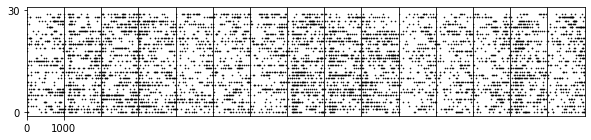

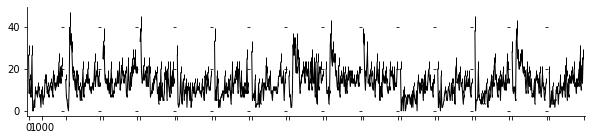

right-top, BLN positive:  21


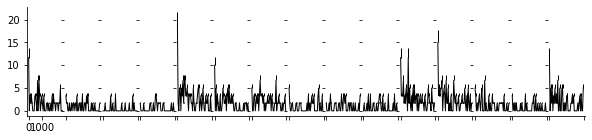

right-top, BLN positive:  27


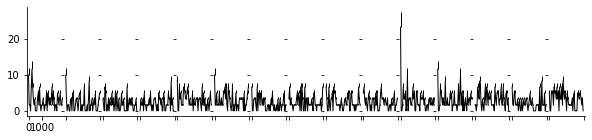

right-top, BLN positive:  47


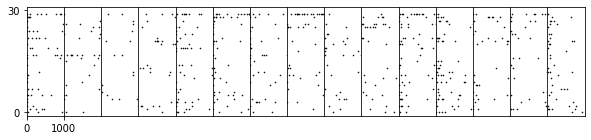

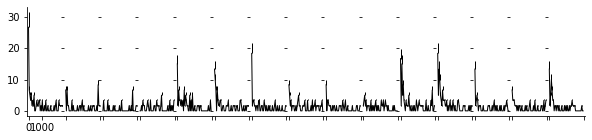

right-top, BLN positive:  60


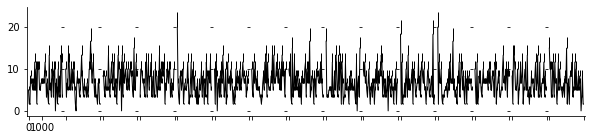

right-top, BLN positive:  72


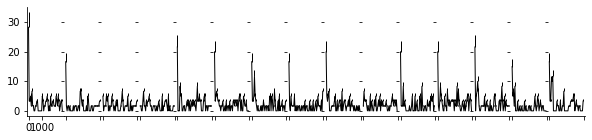

right-top, BLN positive:  125


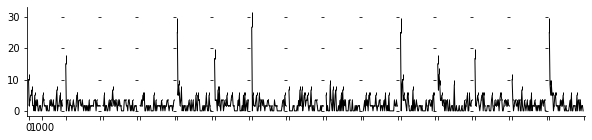

right-bottom, BLN positive:  5


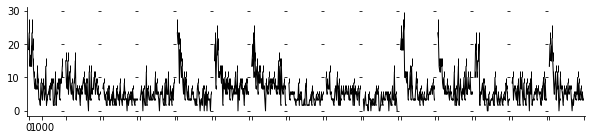

right-bottom, BLN positive:  11


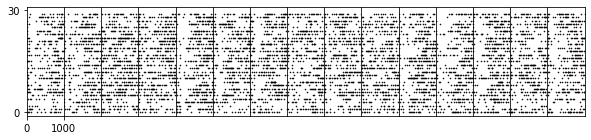

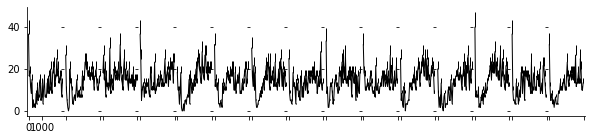

right-bottom, BLN positive:  27


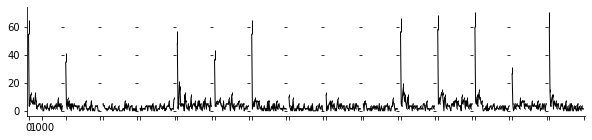

right-bottom, BLN positive:  47


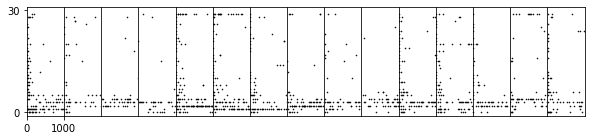

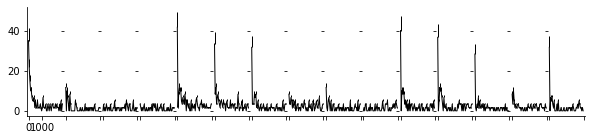

right-bottom, BLN positive:  57


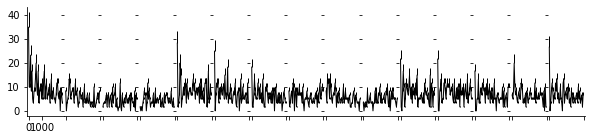

right-bottom, BLN positive:  60


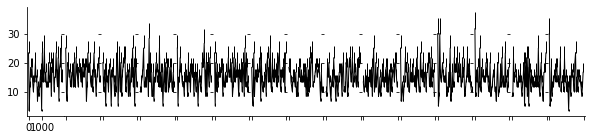

right-bottom, BLN positive:  79


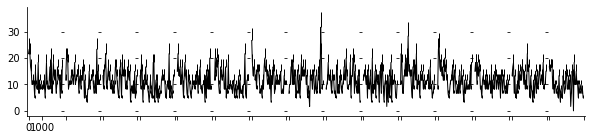

right-bottom, BLN positive:  96


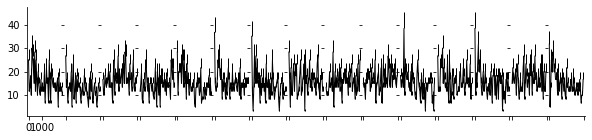

right-bottom, BLN positive:  102


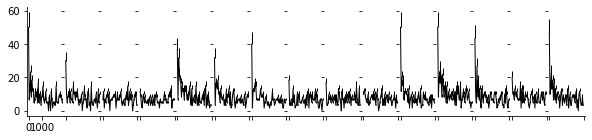

right-bottom, BLN positive:  116


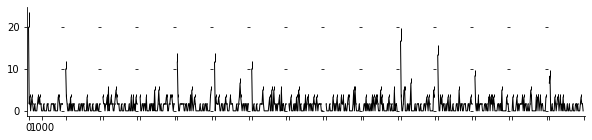

right-bottom, BLN positive:  122


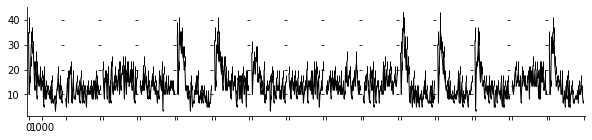

In [12]:
for sim in BLNneuron1:
    print('right-top, BLN positive: ', sim)
    if sim in [11, 47]:
        PatternRaster(pat52[:,:,:,sim], savepath = savedir + '/BLN_examples_raster_pre-mus_{0}.png'.format(sim))
    
    nmean = np.mean(data_mat52[sim,0,:,:,:]/0.02, axis = 1)
    nsem = np.mean(data_mat52[sim,0,:,:,:]/0.02, axis = 1)/np.sqrt(30)
    fig, axs = plt.subplots(1,15, figsize =(10,2), sharey=True)
    xs = np.arange(data_mat52.shape[-1])
    for i in range(15):
        axs[i].errorbar(xs, nmean[i], yerr=[np.zeros_like(nsem[i]), nsem[i]], color='k', linewidth=1)
        if i != 0:
            axs[i].set_xticklabels([])
            axs[i].spines[['left','right', 'top']].set_visible(False)
        else:
            axs[i].spines[['right', 'top']].set_visible(False)
    axs[0].set_xticks([0, 20])
    axs[0].set_xticklabels([0, 1000])
    plt.subplots_adjust(wspace=0, hspace=0)
    if sim in [11, 47]:
        plt.savefig(savedir + '/BLN_examples_pre-mus_{0}.png'.format(sim), dpi=300)

    plt.show()
    

for sim in BLNneuron3:
    print('right-bottom, BLN positive: ', sim)
    if sim in [11, 47]:
        PatternRaster(pat102[:,:,:,sim], savepath = savedir + '/BLN_examples_raster_post-mus_{0}.png'.format(sim))
    nmean = np.mean(data_mat102[sim,0,:,:,:]/0.02, axis = 1)
    nsem = np.mean(data_mat102[sim,0,:,:,:]/0.02, axis = 1)/np.sqrt(30)
    fig, axs = plt.subplots(1,15, figsize =(10,2), sharey=True)
    xs = np.arange(data_mat10.shape[-1])
    for i in range(15):
        axs[i].errorbar(xs, nmean[i], yerr=[np.zeros_like(nsem[i]), nsem[i]], color='k', linewidth=1)
        if i != 0:
            axs[i].set_xticklabels([])
            axs[i].spines[['left','right', 'top']].set_visible(False)
        else:
            axs[i].spines[['right', 'top']].set_visible(False)
    axs[0].set_xticks([0, 20])
    axs[0].set_xticklabels([0, 1000])
    plt.subplots_adjust(wspace=0, hspace=0) 
    if sim in [11, 47]:
        plt.savefig(savedir + '/BLN_examples_post-mus_{0}.png'.format(sim), dpi=300)
    plt.show()
    

left-top, BLN positive:  4


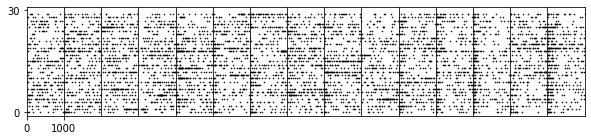

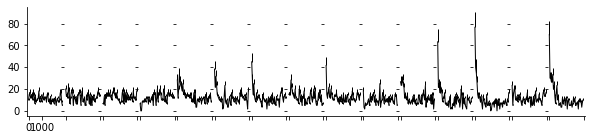

left-top, BLN positive:  7


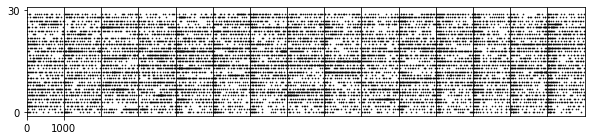

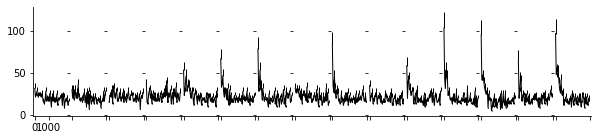

left-top, BLN positive:  9


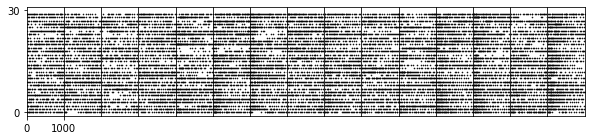

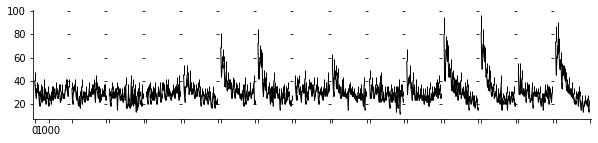

left-top, BLN positive:  23


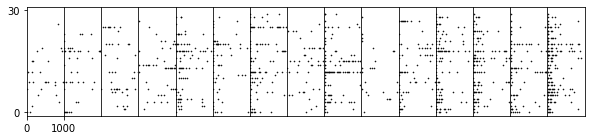

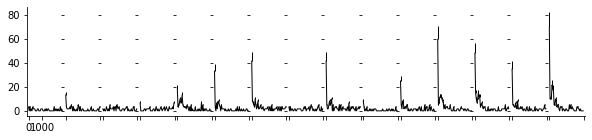

left-top, BLN positive:  27


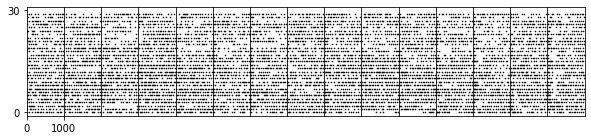

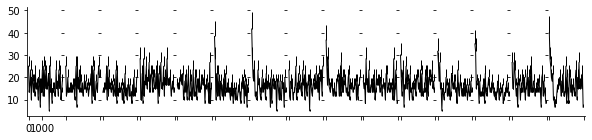

left-top, BLN positive:  33


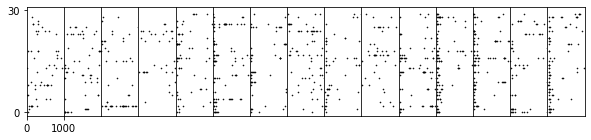

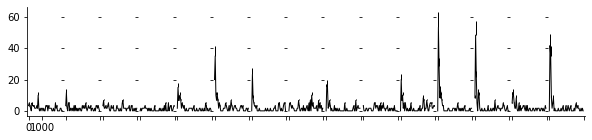

left-top, BLN positive:  86


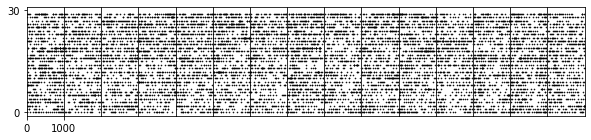

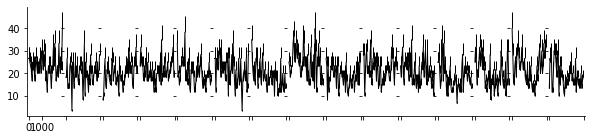

left-top, BLN positive:  101


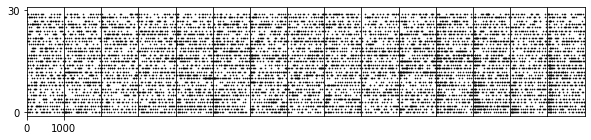

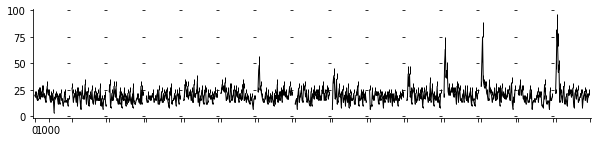

left-top, BLN positive:  108


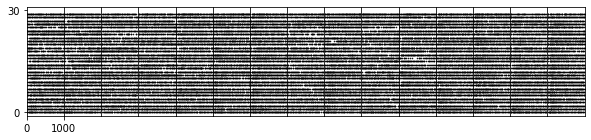

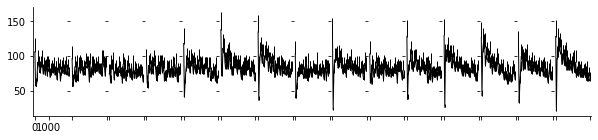

left-top, BLN positive:  145


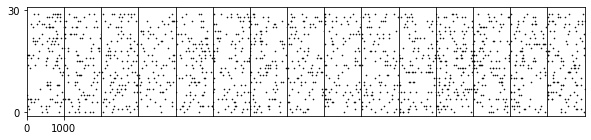

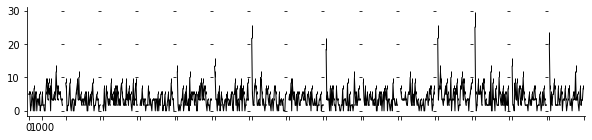

left-top, BLN positive:  157


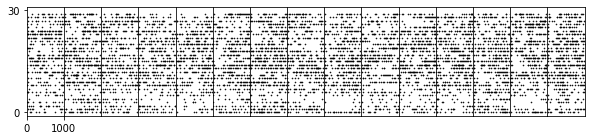

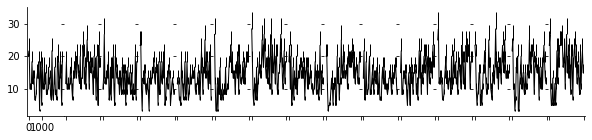

left-top, BLN positive:  165


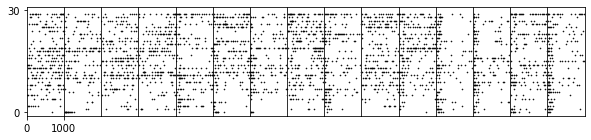

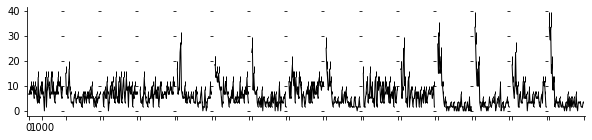

left-top, BLN positive:  167


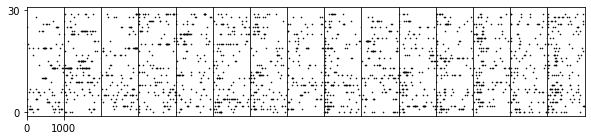

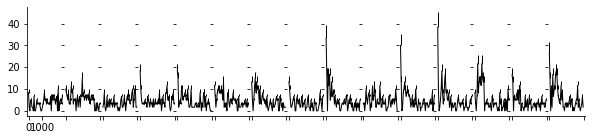

left-top, BLN positive:  168


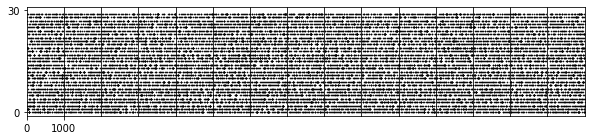

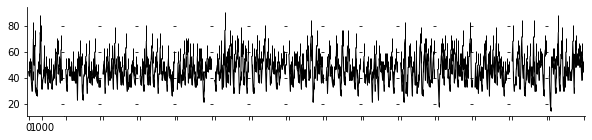

left-top, BLN positive:  171


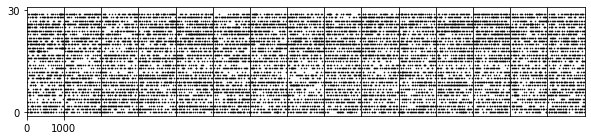

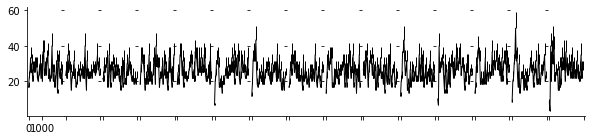

left-top, BLN positive:  194


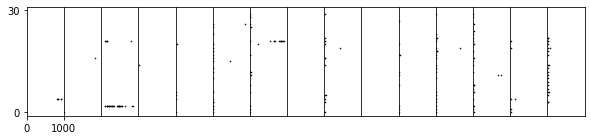

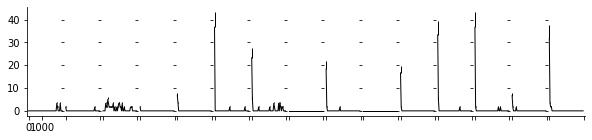

left-bottom, BLN positive:  3


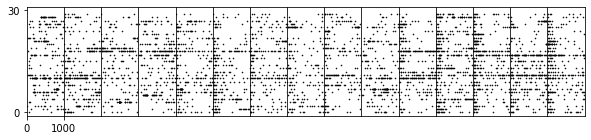

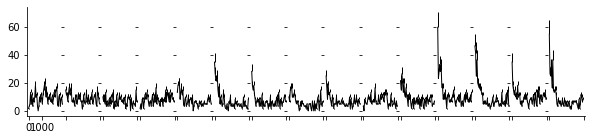

left-bottom, BLN positive:  21


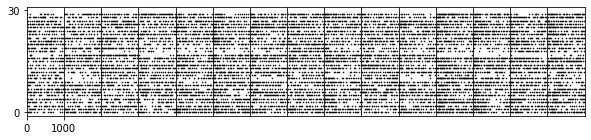

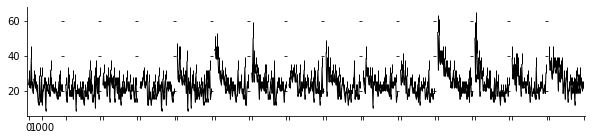

left-bottom, BLN positive:  36


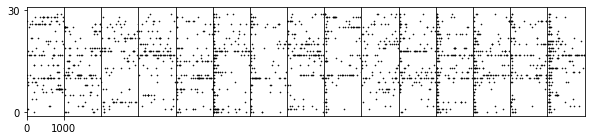

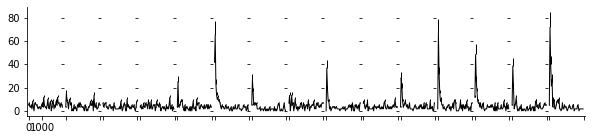

left-bottom, BLN positive:  43


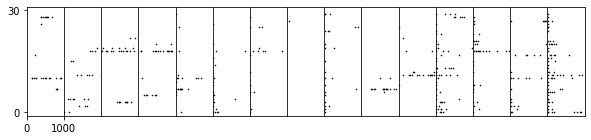

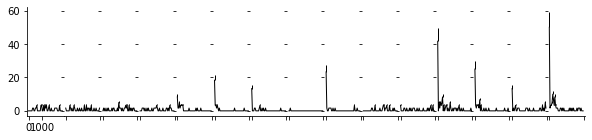

left-bottom, BLN positive:  44


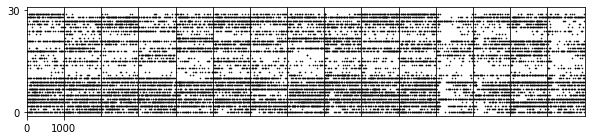

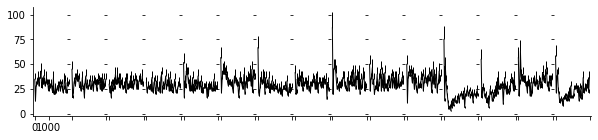

left-bottom, BLN positive:  97


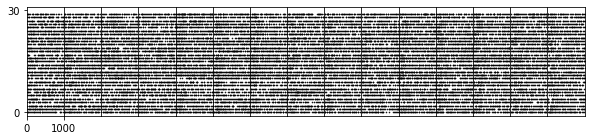

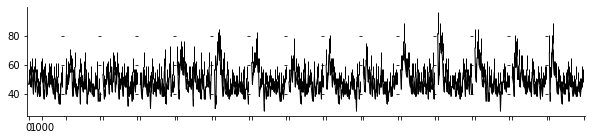

left-bottom, BLN positive:  100


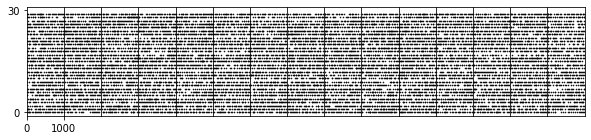

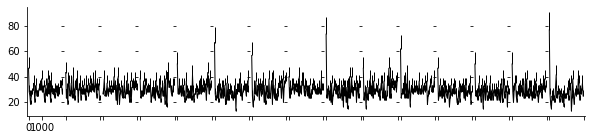

left-bottom, BLN positive:  102


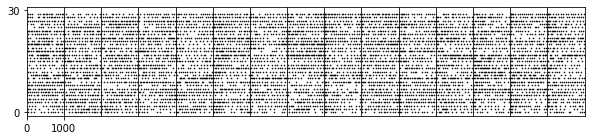

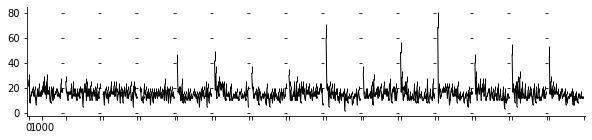

left-bottom, BLN positive:  118


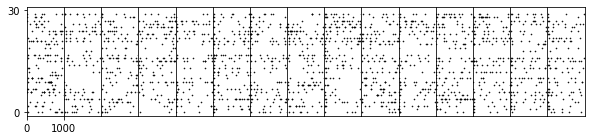

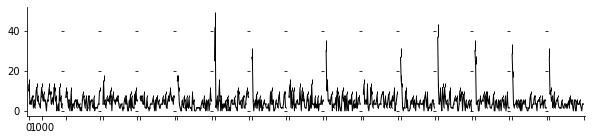

left-bottom, BLN positive:  140


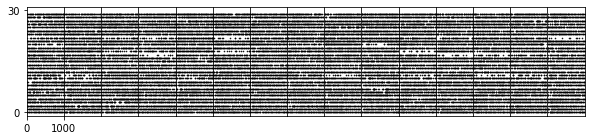

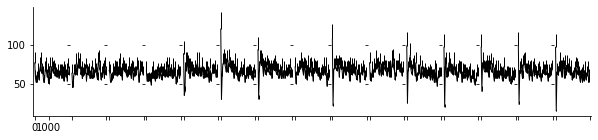

left-bottom, BLN positive:  148


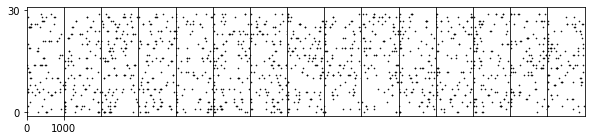

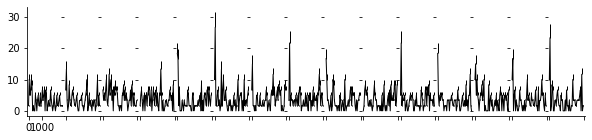

left-bottom, BLN positive:  164


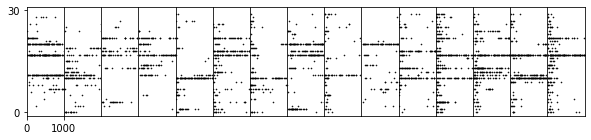

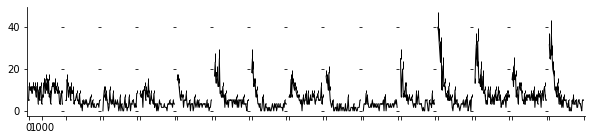

In [11]:
for sim in BLNneuron2:
    print('left-top, BLN positive: ', sim)
    PatternRaster(pat5[:,:,:,sim])
    nmean = np.mean(data_mat5[sim,0,:,:,:]/0.02, axis = 1)
    nsem = np.mean(data_mat5[sim,0,:,:,:]/0.02, axis = 1)/np.sqrt(30)
    fig, axs = plt.subplots(1,15, figsize =(10,2), sharey=True)
    xs = np.arange(data_mat5.shape[-1])
    for i in range(15):
        axs[i].errorbar(xs, nmean[i], yerr=[np.zeros_like(nsem[i]), nsem[i]], color='k', linewidth=1)
        if i != 0:
            axs[i].set_xticklabels([])
            axs[i].spines[['left','right', 'top']].set_visible(False)
        else:
            axs[i].spines[['right', 'top']].set_visible(False)
    axs[0].set_xticks([0, 20])
    axs[0].set_xticklabels([0, 1000])
    plt.subplots_adjust(wspace=0, hspace=0)  
    plt.show()
    
for sim in BLNneuron4:
    print('left-bottom, BLN positive: ', sim)
    PatternRaster(pat10[:,:,:,sim])
    nmean = np.mean(data_mat10[sim,0,:,:,:]/0.02, axis = 1)
    nsem = np.mean(data_mat10[sim,0,:,:,:]/0.02, axis = 1)/np.sqrt(30)
    fig, axs = plt.subplots(1,15, figsize =(10,2), sharey=True)
    xs = np.arange(data_mat10.shape[-1])
    for i in range(15):
        axs[i].errorbar(xs, nmean[i], yerr=[np.zeros_like(nsem[i]), nsem[i]], color='k', linewidth=1)
        if i != 0:
            axs[i].set_xticklabels([])
            axs[i].spines[['left','right', 'top']].set_visible(False)
        else:
            axs[i].spines[['right', 'top']].set_visible(False)
    axs[0].set_xticks([0, 20])
    axs[0].set_xticklabels([0, 1000])
    plt.subplots_adjust(wspace=0, hspace=0)  
    plt.show()